# 불용어 미이용

In [14]:
import nltk
from nltk import ngrams
from collections import Counter
import pandas as pd
from konlpy.tag import Okt

# 텍스트 데이터
df = pd.read_csv('data/프로젝트 데이터_API/상해_본문2.csv')

# 텍스트를 단어로 분할
okt = Okt()

# n-그램 생성 (예: 2-그램)
bigrams0 = []

# 각 판례 내용에 대해 토큰화 및 n-그램 생성
for doc in df['판례내용'].iloc[:200]:  # 필요한 만큼의 문서만 사용
    tokens = okt.nouns(doc)  # 개별 문서에 대해 명사 추출
    bigrams0.extend(ngrams(tokens, 2))  # 2-그램 생성


# n-그램 빈도수 계산
bigram0_counts = Counter(bigrams0)

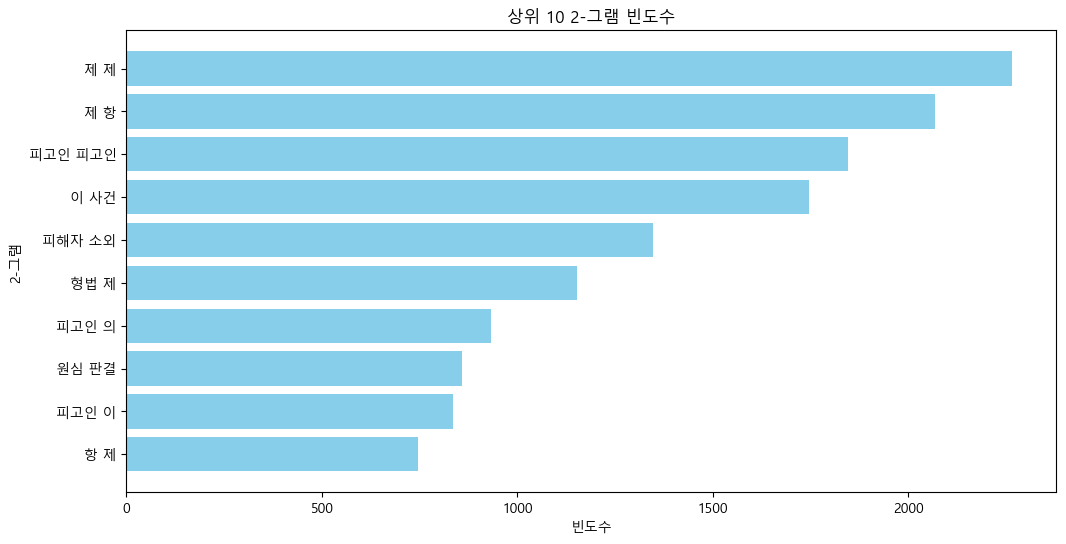

In [15]:
import matplotlib.pyplot as plt

# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams0 = bigram0_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams0, counts = zip(*top_bigrams0)

# n-그램을 문자열로 변환
bigram0_labels = [' '.join(bigram) for bigram in bigrams0]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram0_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('2-그램')
plt.title(f'상위 {top_n} 2-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

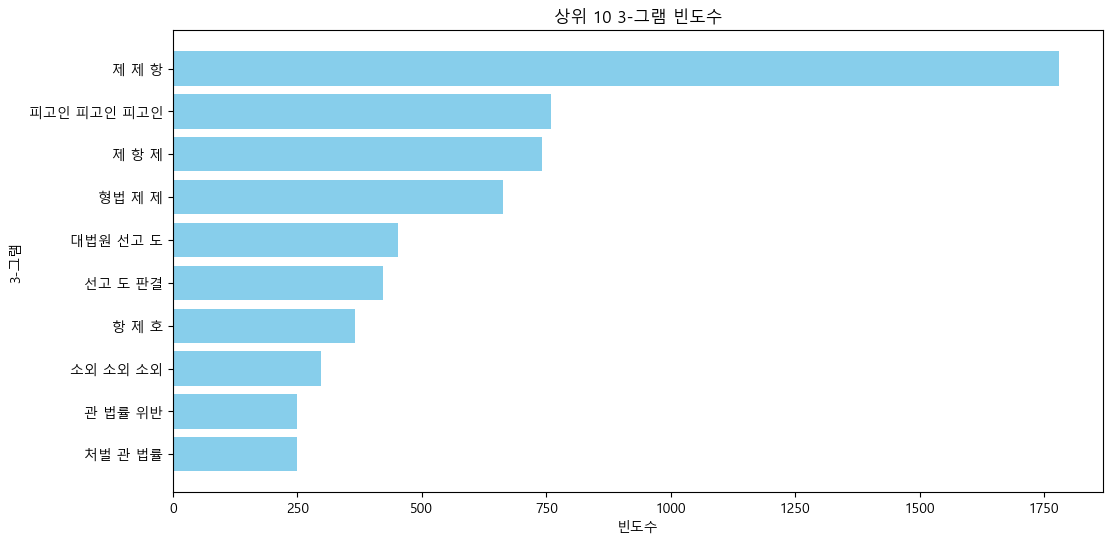

In [16]:
# n-그램 생성 (예: 2-그램)
bigrams03 = []

# 각 판례 내용에 대해 토큰화 및 n-그램 생성
for doc in df['판례내용'].iloc[:200]:  # 필요한 만큼의 문서만 사용
    tokens = okt.nouns(doc)  # 개별 문서에 대해 명사 추출
    bigrams03.extend(ngrams(tokens, 3))  # 2-그램 생성
    
# n-그램 빈도수 계산
bigram03_counts = Counter(bigrams03)

# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams03 = bigram03_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams03, counts = zip(*top_bigrams03)

# n-그램을 문자열로 변환
bigram03_labels = [' '.join(bigram) for bigram in bigrams03]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram03_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('3-그램')
plt.title(f'상위 {top_n} 3-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

# 불용어 이용

In [12]:
import nltk
from nltk import ngrams
from collections import Counter
import pandas as pd
from konlpy.tag import Okt

# 텍스트 데이터
df = pd.read_csv('data/프로젝트 데이터_API/상해_본문2.csv')
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []

with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

# 텍스트를 단어로 분할
okt = Okt()
tokenized_docs = []

for doc in df['판례내용'].iloc[:200]:  # 단어 단위로 토큰화 하고 불용어를 제거하였다.
    tokens = okt.nouns(doc)
    filtered_tokens = [word for word in tokens if word not in stopwords]
    tokenized_docs.append(filtered_tokens)  # 리스트로 저장

# n-그램 생성 (예: 2-그램)
bigrams = []

for tokens in tokenized_docs:
    bigrams.extend(ngrams(tokens, 2))  # 각 문서에서 2-그램 생성

# n-그램 빈도수 계산
bigram_counts = Counter(bigrams)

# 결과 출력
print(bigram_counts.most_common(10))  # 상위 10개 n-그램 출력

[(('채택', '조사'), 165), (('징역형', '선택'), 153), (('선박', '선장'), 141), (('선장', '승무원'), 131), (('수사', '보고'), 128), (('회사', '대판'), 126), (('대판', '회사'), 126), (('경합', '가중'), 123), (('오인', '오해'), 115), (('임의', '감경'), 115)]


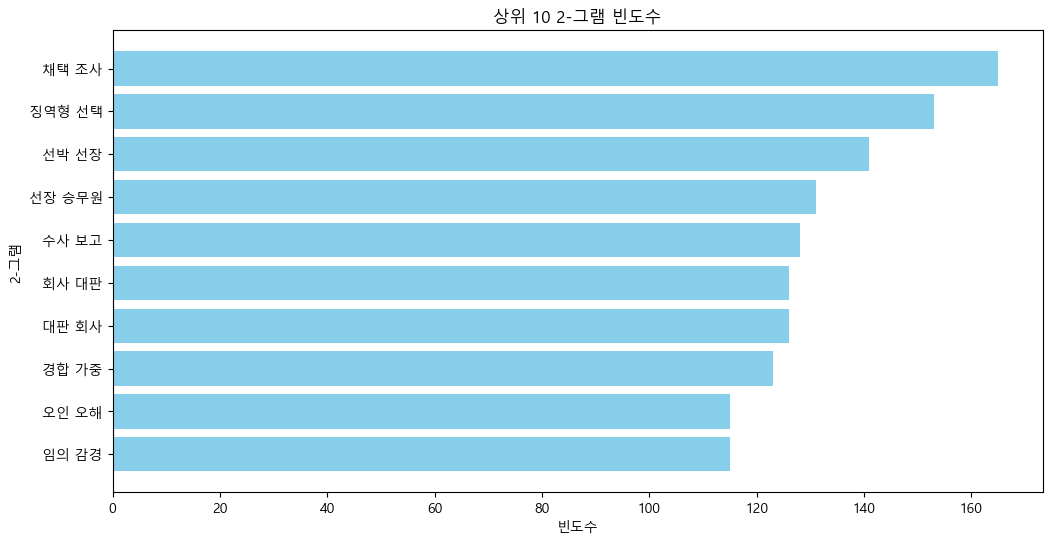

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Malgun Gothic 폰트 경로 (시스템에 따라 변경)
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())


# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams = bigram_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams, counts = zip(*top_bigrams)

# n-그램을 문자열로 변환
bigram_labels = [' '.join(bigram) for bigram in bigrams]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('2-그램')
plt.title(f'상위 {top_n} 2-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

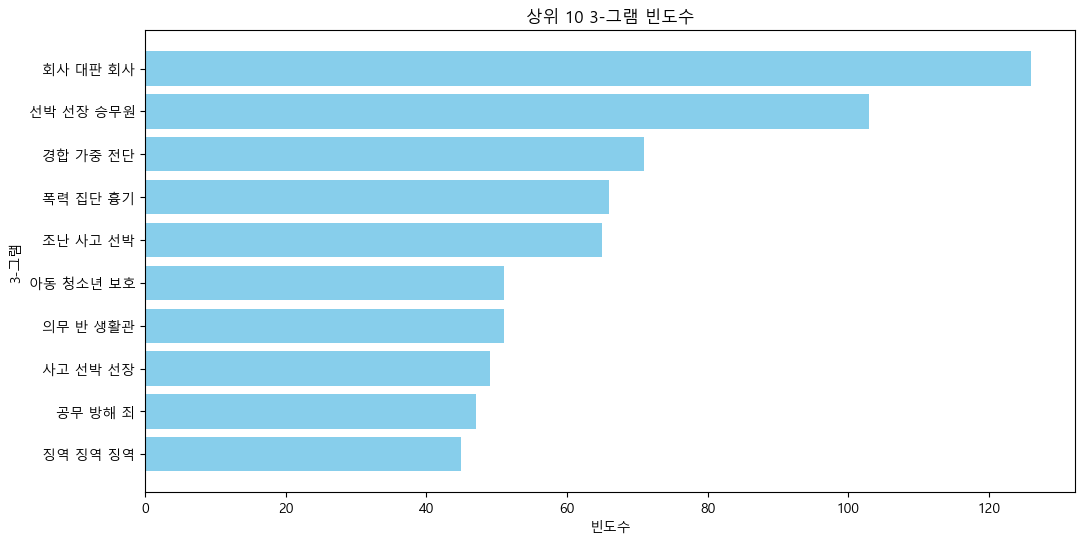

In [14]:
# n-그램 생성 ( 3-그램)
bigrams3 = []

for tokens in tokenized_docs:
    bigrams3.extend(ngrams(tokens, 3))  # 각 문서에서 3-그램 생성

# n-그램 빈도수 계산
bigram3_counts = Counter(bigrams3)

# n-그램 빈도수에서 상위 10개 추출
top_n = 10
top_bigrams3 = bigram3_counts.most_common(top_n)

# n-그램과 그 빈도수 분리
bigrams3, counts = zip(*top_bigrams3)

# n-그램을 문자열로 변환
bigram3_labels = [' '.join(bigram) for bigram in bigrams3]

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(bigram3_labels, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('3-그램')
plt.title(f'상위 {top_n} 3-그램 빈도수')
plt.gca().invert_yaxis()  # 상위 항목이 위로 오도록
plt.show()

In [15]:
for doc in df['판례내용'].iloc[:200]:  # 단어 단위로 토큰화 하고 불용어를 제거하였다.
    tokens = okt.nouns(doc)
    filtered_tokens = [word for word in tokens if word not in stopwords]
    tokenized_docs.append(filtered_tokens)  # 리스트로 저장

# n-그램 생성 (예: 3-그램)
bigrams = []
threegrams = []

for tokens in tokenized_docs:
    # 3-그램 생성, 중복 단어가 있는 n-그램은 제외
    for gram in ngrams(tokens, 3):
        if len(set(gram)) == len(gram):  # 중복 단어가 없을 경우만 추가
            threegrams.append(gram)

# n-그램 빈도수 계산
threegram_counts = Counter(threegrams)

# 결과 출력
print(threegram_counts.most_common(10))  # 상위 10개 n-그램 출력

[(('선박', '선장', '승무원'), 206), (('경합', '가중', '전단'), 142), (('폭력', '집단', '흉기'), 132), (('조난', '사고', '선박'), 130), (('아동', '청소년', '보호'), 102), (('의무', '반', '생활관'), 102), (('사고', '선박', '선장'), 98), (('공무', '방해', '죄'), 94), (('소', '검', '사'), 86), (('소속', '의무', '반'), 86)]


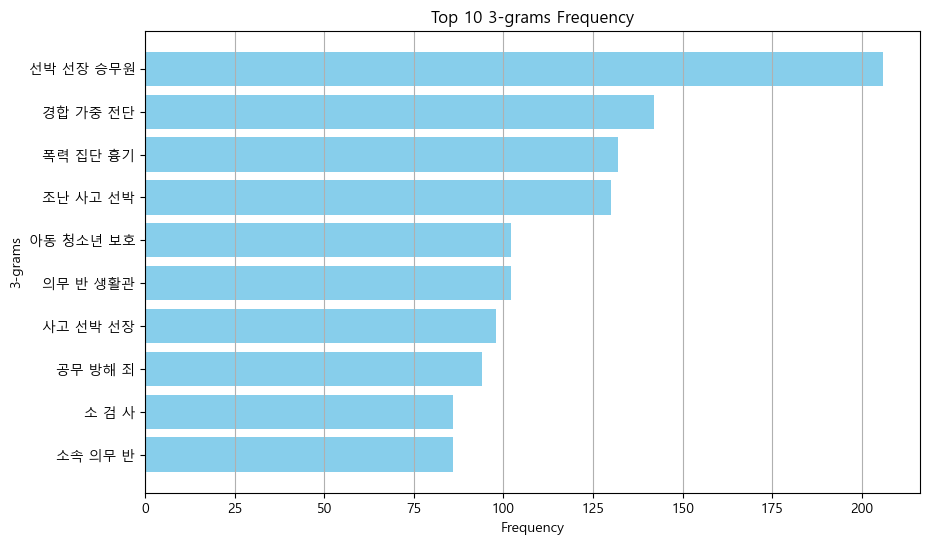

In [16]:
# 상위 10개 n-그램과 그 빈도수 추출
top_n_grams = threegram_counts.most_common(10)
n_grams, frequencies = zip(*top_n_grams)  # n-그램과 빈도수 분리

# n-그램을 문자열로 변환
n_grams = [' '.join(gram) for gram in n_grams]

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(n_grams, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('3-grams')
plt.title('Top 10 3-grams Frequency')
plt.grid(axis='x')
plt.gca().invert_yaxis() 
plt.show()

추가적인 불용어가 필요하다.